<a href="https://colab.research.google.com/github/CHIRANJEET12/Machine-Learning/blob/main/gradientdecent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Create simple dataset  or use dataset

In [86]:
x = np.array([1,2,3,4,5])
y = np.array([5, 8, 11, 14, 17])
  # True equation: y = 2 + 3x

Add a bias term (intercept column)====We need to add a column of 1s to account for 0.

In [72]:
m = len(x)
x_b = np.c_[np.ones(m),x]

initialize parameters

In [73]:
# Start with theta0=0, theta1=0
theta = np.zeros(2)

Set learning rate and iterations

In [74]:
alpha = 0.01    # Learning rate (small step size)
iterations  = 1000   # How many steps to run


Gradient descent loop

In [87]:
for i in range(iterations ):
    predictions = x_b.dot(theta)             # Compute h(x) for all inputs
    errors = predictions - y                 # Difference from actual y
    gradients = (1/m) * x_b.T.dot(errors)    # Partial derivatives
    theta = theta - alpha * gradients        # Update parameters  repeat convergence theorum


In [89]:
print(f"Learned parameters: theta0 = {theta[0]:.2f}, theta1 = {theta[1]:.2f}")

Learned parameters: theta0 = 2.59, theta1 = 2.84


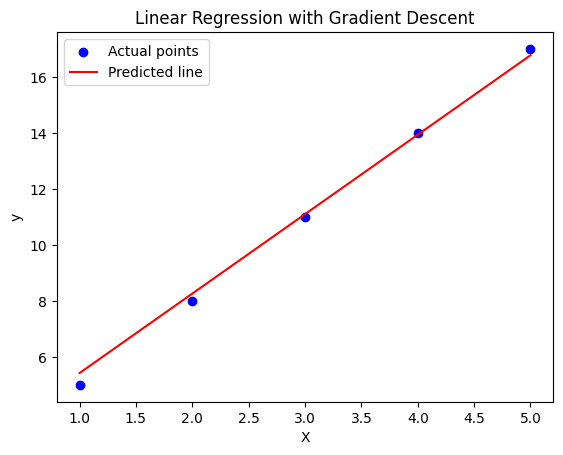

In [90]:
plt.scatter(x, y, color='blue', label='Actual points')
plt.plot(x, x_b.dot(theta), color='red', label='Predicted line')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.show()


In [22]:
from sklearn.metrics import r2_score

In [91]:
score = r2_score(y,predictions)
print(score)

0.9965034158630567


In [37]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

In [42]:
df = load_diabetes()
dataset = pd.DataFrame(df.data, columns=df.feature_names)
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [43]:
x = dataset
y = df.target

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [47]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

add a bias term

In [60]:
X_b = np.c_[np.ones((x_train.shape[0], 1)), x_train]

In [63]:
theta = np.random.randn(X_b.shape[1], 1)
y_train = y_train.reshape(-1, 1)
alpha = 0.1
iterations = 1000
m = len(X_b)

In [69]:
cost_history = []

for i in range(iterations):
    predictions = X_b.dot(theta)
    errors = predictions - y_train
    cost = (1/(2*m)) * np.sum(errors ** 2)   # Mean Squared Error
    cost_history.append(cost)

    gradients = (1/m) * X_b.T.dot(errors)
    theta = theta - alpha * gradients


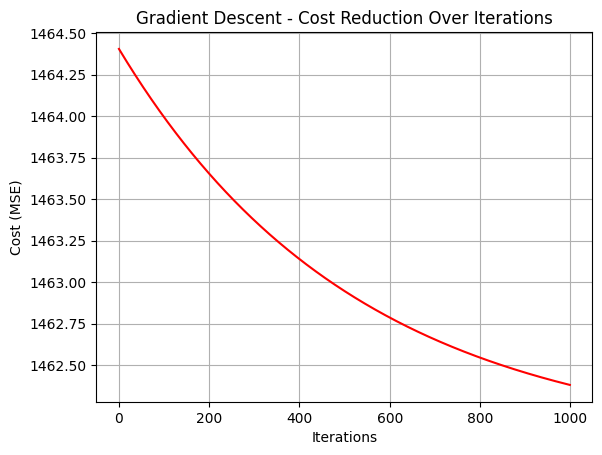

In [70]:
plt.plot(range(iterations), cost_history, color='red')
plt.title("Gradient Descent - Cost Reduction Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()
